In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [0]:
haber=pd.read_csv('haberman.csv',header=-1) #used 'header=-1' to stop the pandas from taking the first row as header which is resulting in loss of data from first row
print(haber)

      0   1   2  3
0    30  64   1  1
1    30  62   3  1
2    30  65   0  1
3    31  59   2  1
4    31  65   4  1
5    33  58  10  1
6    33  60   0  1
7    34  59   0  2
8    34  66   9  2
9    34  58  30  1
10   34  60   1  1
11   34  61  10  1
12   34  67   7  1
13   34  60   0  1
14   35  64  13  1
15   35  63   0  1
16   36  60   1  1
17   36  69   0  1
18   37  60   0  1
19   37  63   0  1
20   37  58   0  1
21   37  59   6  1
22   37  60  15  1
23   37  63   0  1
24   38  69  21  2
25   38  59   2  1
26   38  60   0  1
27   38  60   0  1
28   38  62   3  1
29   38  64   1  1
..   ..  ..  .. ..
276  67  66   0  1
277  67  61   0  1
278  67  65   0  1
279  68  67   0  1
280  68  68   0  1
281  69  67   8  2
282  69  60   0  1
283  69  65   0  1
284  69  66   0  1
285  70  58   0  2
286  70  58   4  2
287  70  66  14  1
288  70  67   0  1
289  70  68   0  1
290  70  59   8  1
291  70  63   0  1
292  71  68   2  1
293  72  63   0  2
294  72  58   0  1
295  72  64   0  1
296  72  67 

In [0]:
haber.columns=['Age','Year','Nodes','survival']
print(haber)

     Age  Year  Nodes  survival
0     30    64      1         1
1     30    62      3         1
2     30    65      0         1
3     31    59      2         1
4     31    65      4         1
5     33    58     10         1
6     33    60      0         1
7     34    59      0         2
8     34    66      9         2
9     34    58     30         1
10    34    60      1         1
11    34    61     10         1
12    34    67      7         1
13    34    60      0         1
14    35    64     13         1
15    35    63      0         1
16    36    60      1         1
17    36    69      0         1
18    37    60      0         1
19    37    63      0         1
20    37    58      0         1
21    37    59      6         1
22    37    60     15         1
23    37    63      0         1
24    38    69     21         2
25    38    59      2         1
26    38    60      0         1
27    38    60      0         1
28    38    62      3         1
29    38    64      1         1
..   ...

In [0]:
#to get the number of data points
print(haber.shape)

(306, 4)


In [0]:
#to find features for data set
print(haber.columns)

Index(['Age', 'Year', 'Nodes', 'survival'], dtype='object')


In [0]:
#(Q) How many data points for each class are present? 
haber['survival'].value_counts()
# this is not a balanced dataset

1    225
2     81
Name: survival, dtype: int64

# (3.2) 2-D Scatter Plot

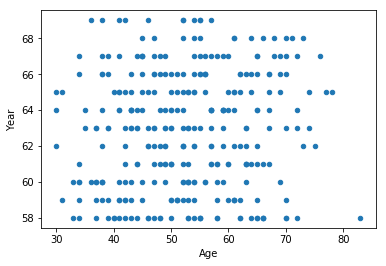

In [0]:
haber.plot(x='Age',y='Year',kind='scatter')
plt.show()

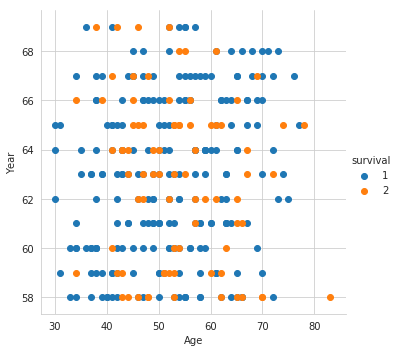

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue='survival',height=5) \
   .map(plt.scatter, "Age", "Year") \
   .add_legend();
# using Seabord for get hue for different set of classes

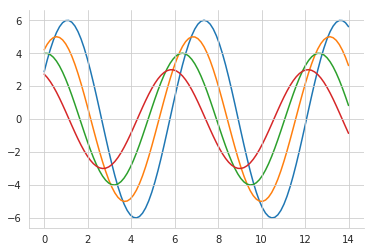

In [0]:
import numpy as np
from matplotlib import pyplot as plt
def sinplot(flip=1):
   x = np.linspace(0, 14, 100)
   for i in range(1, 5):
      plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
import seaborn as sb
sb.set_style("whitegrid", {'axes.axisbelow': False})
sinplot()
sb.despine()
plt.show()

#  (3.3) Pair-plot

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


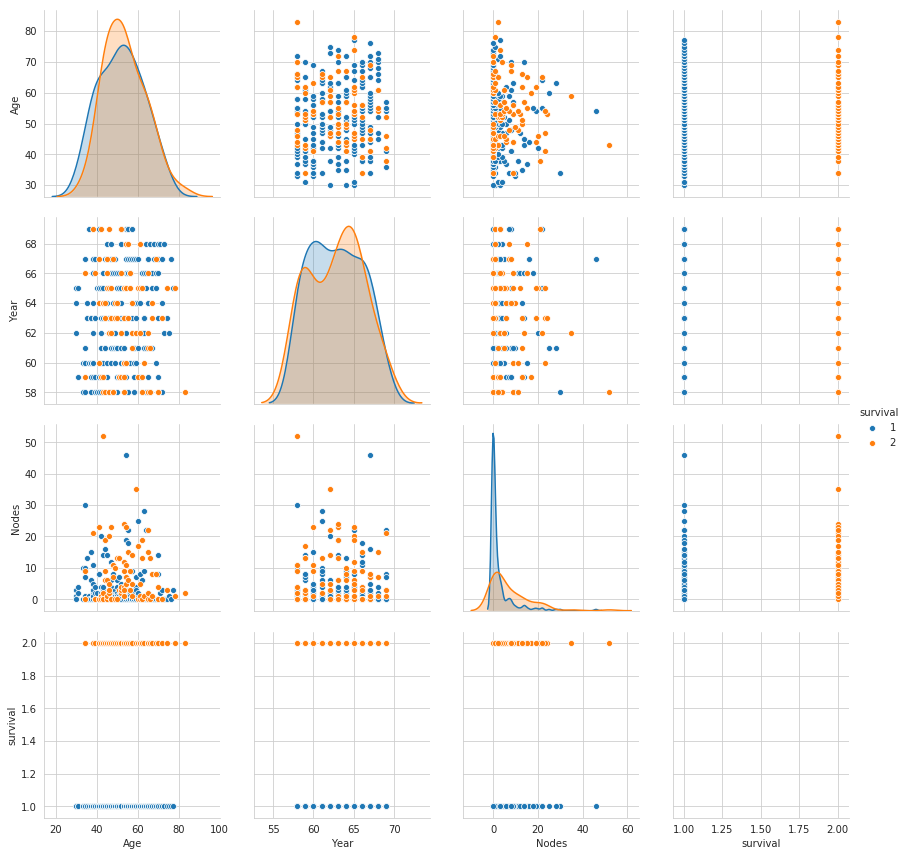

In [0]:
sns.set_style("whitegrid");
sns.pairplot(haber, hue="survival", height=3);
plt.show()

By seeing 'Age-Nodes' graph I suspect that people those who were operated for less than 20 lymph nodes and under age of 40 had a better chance of survival
By seeing 'Age-Year' graph I suspect that people those who were operated between 1958-1965 and under age of 40 had a better chance of survival

# (3.4) Histogram, PDF, CDF

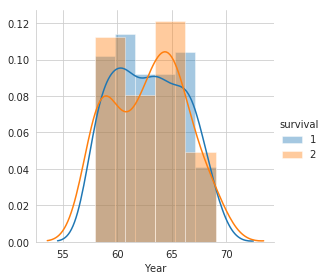

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue='survival',height=4).map(sns.distplot,'Year').add_legend()

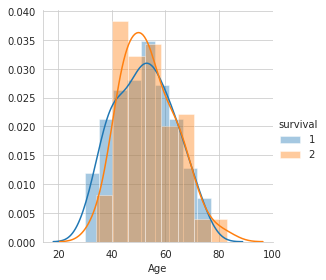

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue='survival',height=4).map(sns.distplot,'Age').add_legend()

This histogram of 'Age' show that people ander age of 40 at the time of surgery had a better rate of survival 

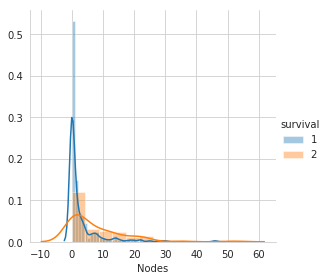

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue='survival',height=4).map(sns.distplot,'Nodes').add_legend()

his histogram of 'Nodes' show that people those who were operated for less than 10 lymph nodes had a better rate of survival

In [0]:
alive=haber.loc[haber['survival']==1]
dead=haber.loc[haber['survival']==2]
print(alive)

     Age  Year  Nodes  survival
0     30    64      1         1
1     30    62      3         1
2     30    65      0         1
3     31    59      2         1
4     31    65      4         1
5     33    58     10         1
6     33    60      0         1
9     34    58     30         1
10    34    60      1         1
11    34    61     10         1
12    34    67      7         1
13    34    60      0         1
14    35    64     13         1
15    35    63      0         1
16    36    60      1         1
17    36    69      0         1
18    37    60      0         1
19    37    63      0         1
20    37    58      0         1
21    37    59      6         1
22    37    60     15         1
23    37    63      0         1
25    38    59      2         1
26    38    60      0         1
27    38    60      0         1
28    38    62      3         1
29    38    64      1         1
30    38    66      0         1
31    38    66     11         1
32    38    60      1         1
..   ...

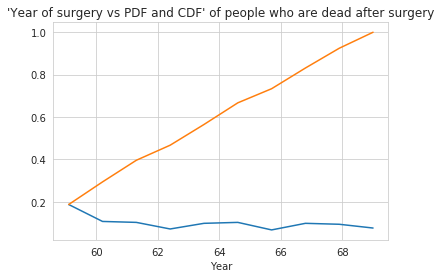

In [0]:
counts,bin_edges=np.histogram(alive['Year'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.xlabel('Year')
plt.title("'Year of surgery vs PDF and CDF' of people who are dead after surgery")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

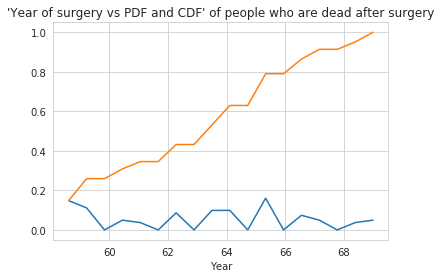

In [0]:
counts,bin_edges=np.histogram(dead['Year'],bins=18,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
#print(pdf)
#print(cdf)
plt.xlabel('Year')
plt.title("'Year of surgery vs PDF and CDF' of people who are dead after surgery")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

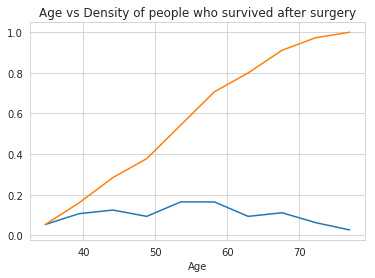

In [0]:
counts,bin_edges=np.histogram(alive['Age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
#print(pdf)
#print(cdf)
plt.xlabel('Age')
plt.title('Age vs Density of people who survived after surgery')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

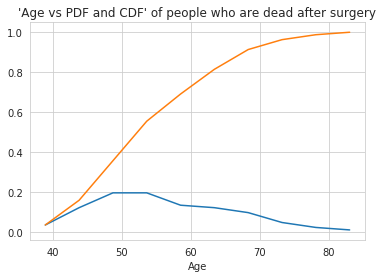

In [0]:
counts,bin_edges=np.histogram(dead['Age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
#print(pdf)
#print(cdf)
plt.xlabel('Age')
plt.title("'Age vs PDF and CDF' of people who are dead after surgery")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

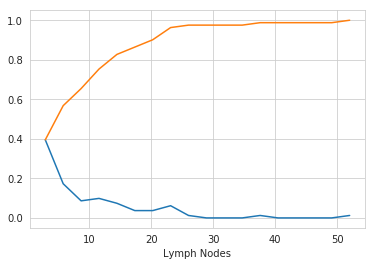

In [0]:
counts,bin_edges=np.histogram(dead['Nodes'],bins=18,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
#print(pdf)
#print(cdf)
plt.xlabel('Lymph Nodes')
plt.title("'No of Lymph Nodes during operation vs PDF and CDF' of people who are dead after surgery")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

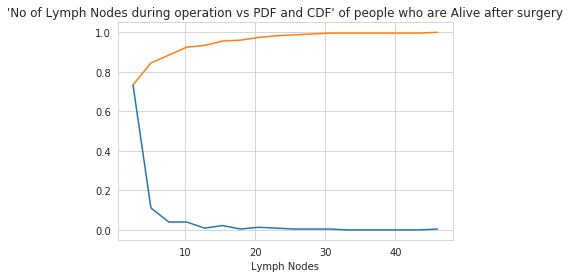

In [0]:
counts,bin_edges=np.histogram(alive['Nodes'],bins=18,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
#print(pdf)
#print(cdf)
plt.xlabel('Lymph Nodes')
plt.title("'No of Lymph Nodes during operation vs PDF and CDF' of people who are Alive after surgery")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


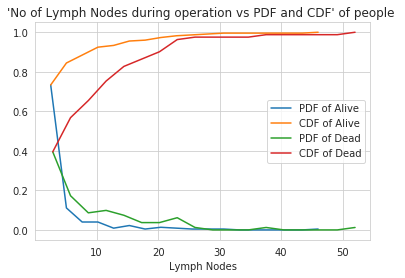

In [0]:
counts,bin_edges=np.histogram(alive['Nodes'],bins=18,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF of Alive')
plt.plot(bin_edges[1:],cdf,label='CDF of Alive')

counts,bin_edges=np.histogram(dead['Nodes'],bins=18,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)


plt.xlabel('Lymph Nodes')
plt.title("'No of Lymph Nodes during operation vs PDF and CDF' of people ")
plt.plot(bin_edges[1:],pdf,label='PDF of Dead')
plt.plot(bin_edges[1:],cdf,label='CDF of Dead')
plt.legend()
plt.show()

# (3.6) Median, Percentile, Quantile, IQR, MAD

In [0]:
#Mean
print("Age-mean\n")
print(np.mean(alive["Age"]))
print(np.mean(dead["Age"]))

print("\nStd-dev:");
print(np.std(alive["Age"]))
print(np.std(dead["Age"]))



Age-mean

52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [0]:
print("\nMedians");
print(np.median(alive["Age"]))
print(np.median(dead["Age"]))


print("\nQuantiles:")
print(np.percentile(alive["Age"],np.arange(0, 100, 25)))
print(np.percentile(dead["Age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(alive["Age"],90))
print(np.percentile(dead["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["Age"]))
print(robust.mad(dead["Age"]))


Medians
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# (3.7) Box plot and Whiskers

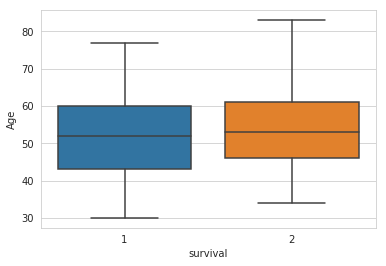

In [0]:
sns.boxplot(x='survival',y='Age',data=haber)
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


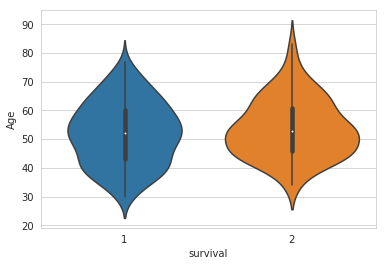

In [0]:
sns.violinplot(x='survival',y='Age',data=haber)
plt.show()

# (3.8) Contour Plot

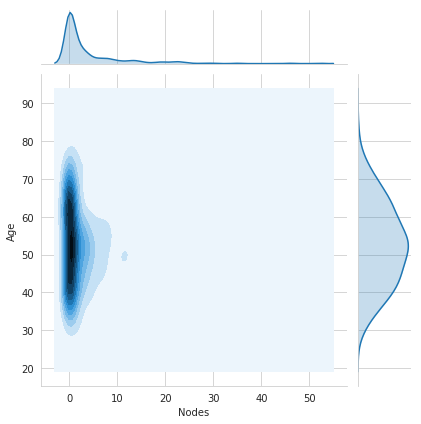

In [0]:
sns.jointplot(x='Nodes',y='Age',data=haber, kind="kde");
plt.show();


As per my observation it is difficult to classify the survival with this limited amount of data however "Number of lymph nodes" and the "Age at the time of surgery" are looking promising for future classification with good amount of data. But we can come to conclusion that less the no of lymph nodes better the rate of survival